In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Dataset loaded successfully!
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

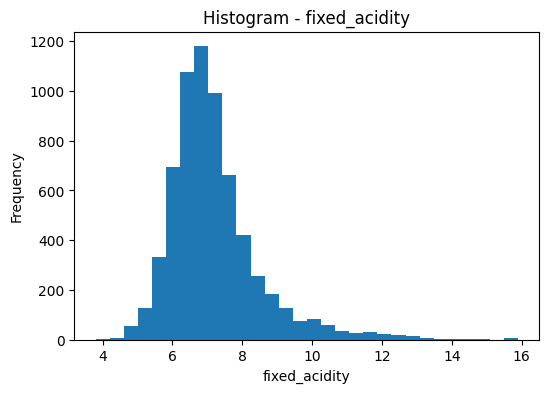

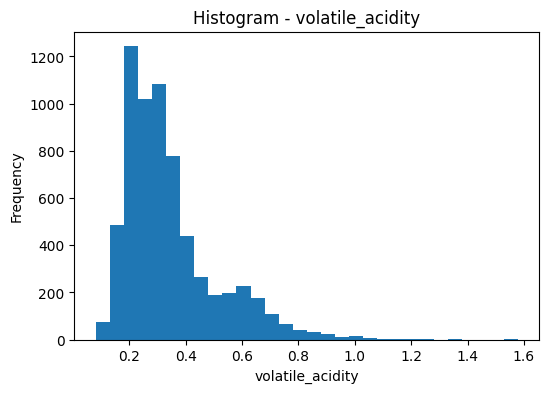

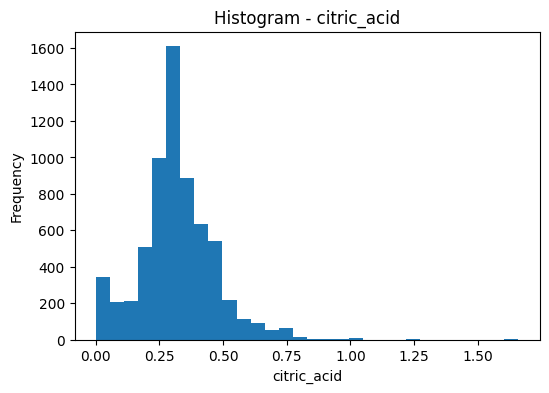

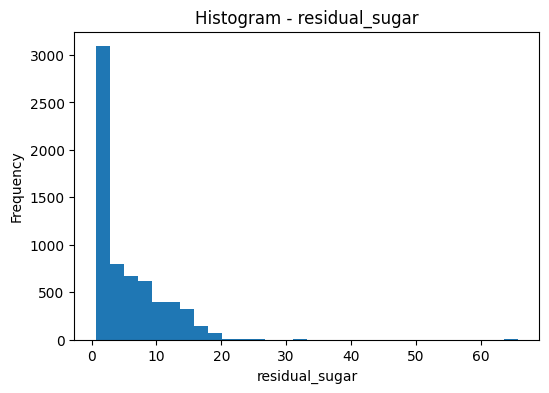

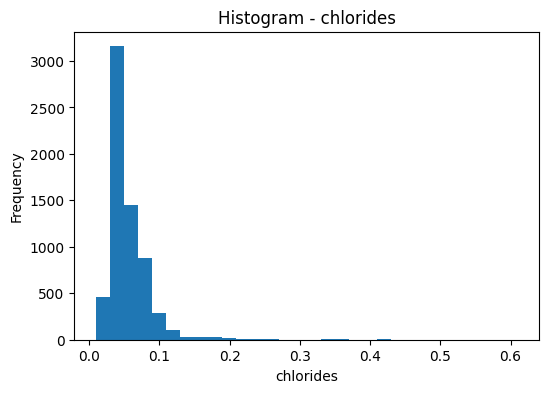

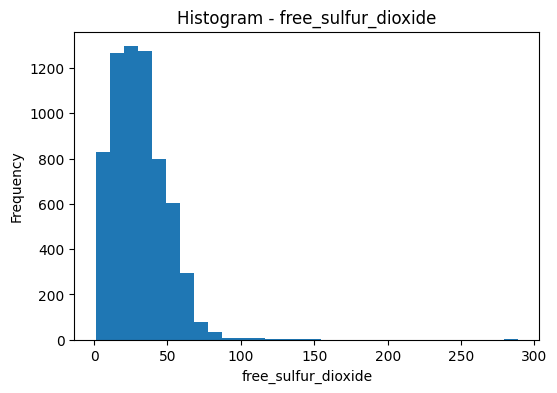

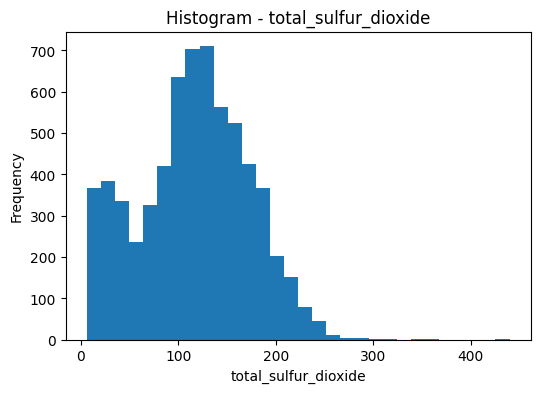

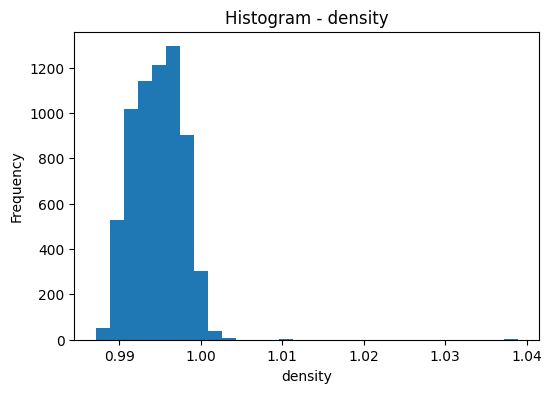

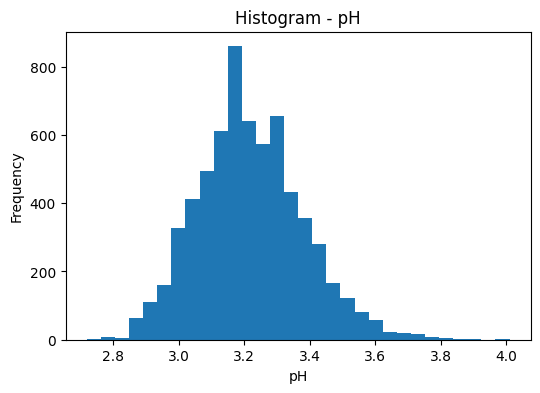

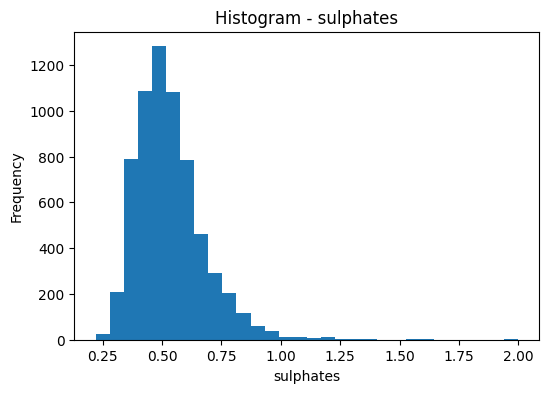

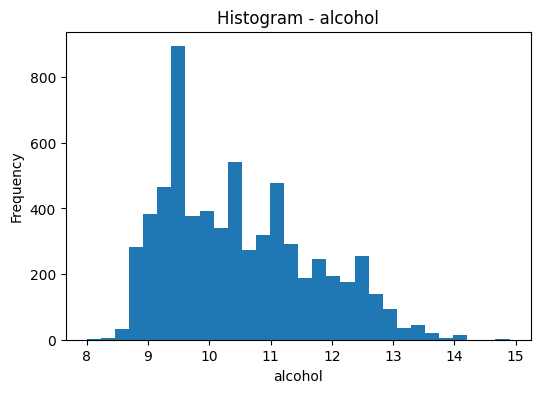

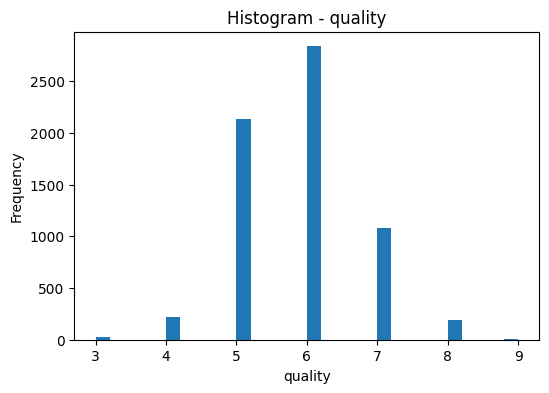

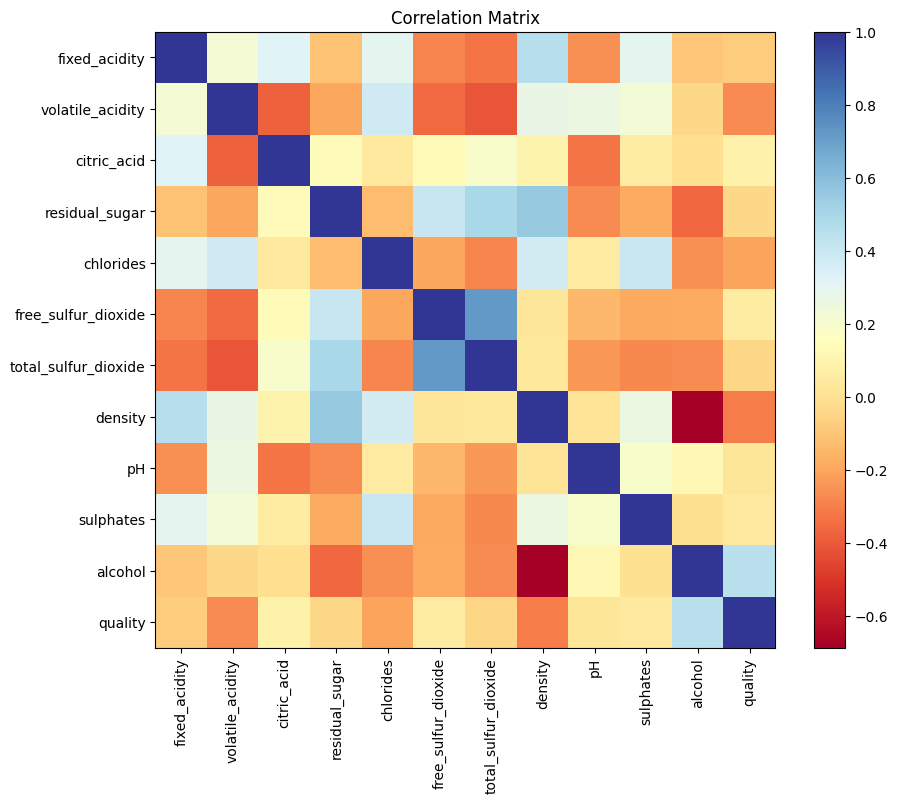

Corr with quality:
quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


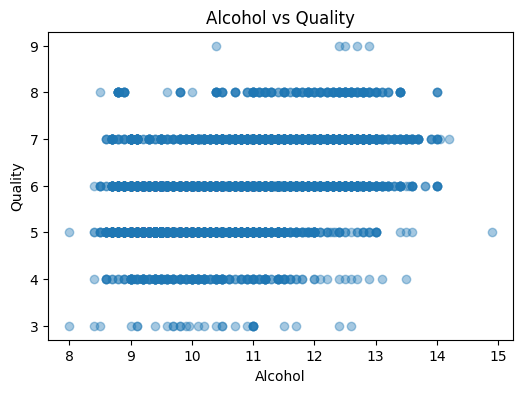

/tmp/ipython-input-3666139746.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["low", "medium", "high"])


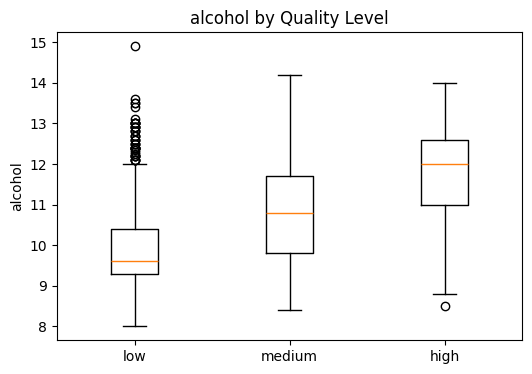

/tmp/ipython-input-3666139746.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["low", "medium", "high"])


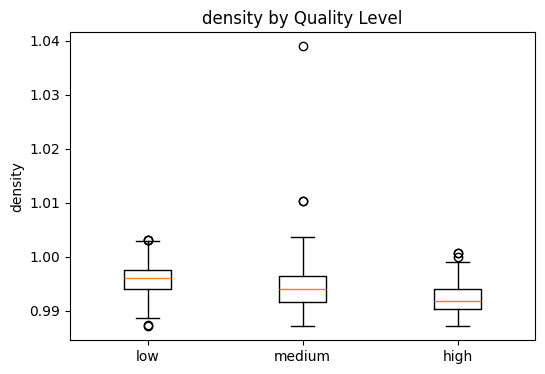

/tmp/ipython-input-3666139746.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["low", "medium", "high"])


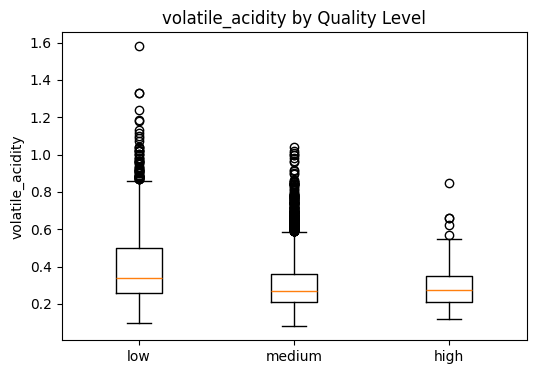

/tmp/ipython-input-3666139746.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["low", "medium", "high"])


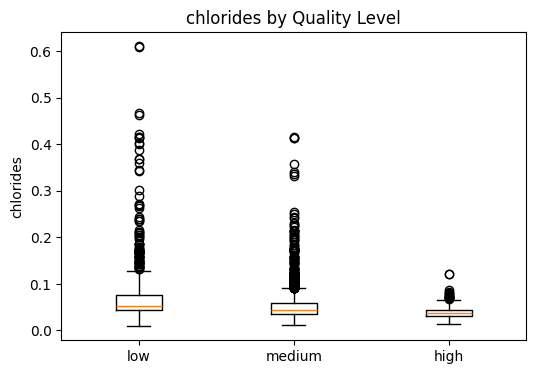

/tmp/ipython-input-3666139746.py:95: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["low", "medium", "high"])


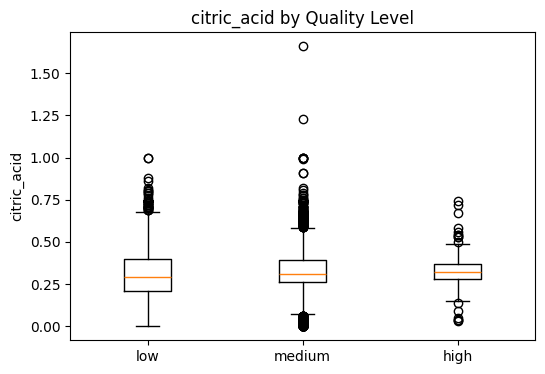

Accuracy: 0.8104615384615385
              precision    recall  f1-score   support

        high       1.00      0.42      0.59        50
         low       0.78      0.74      0.76       596
      medium       0.82      0.87      0.85       979

    accuracy                           0.81      1625
   macro avg       0.87      0.68      0.73      1625
weighted avg       0.81      0.81      0.81      1625



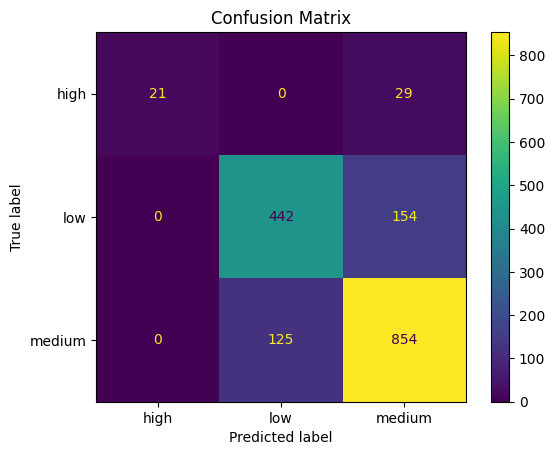

alcohol                 0.149895
volatile_acidity        0.114479
density                 0.102197
total_sulfur_dioxide    0.086511
free_sulfur_dioxide     0.083891
sulphates               0.082272
chlorides               0.081847
residual_sugar          0.080519
citric_acid             0.076295
pH                      0.073143
fixed_acidity           0.068953
dtype: float64


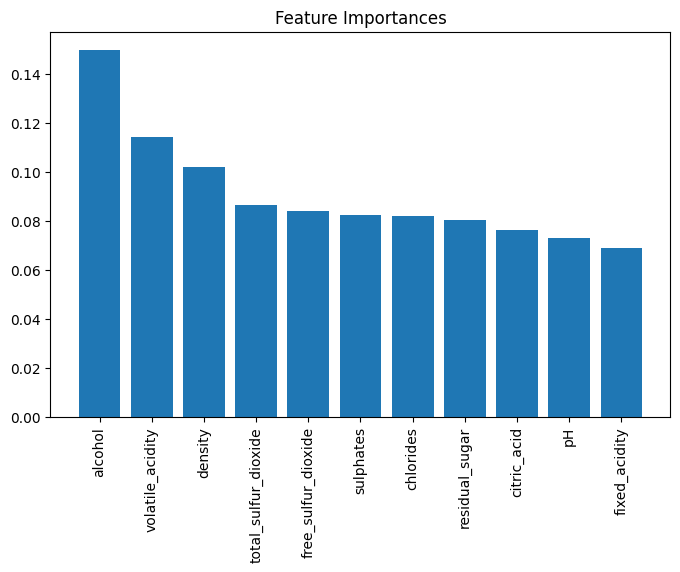

In [6]:
# ===============================================================
# 1) LOAD DATASET FROM UCIMLREPO (no zip, no paths)
# ===============================================================
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fetch Wine Quality dataset
wine = fetch_ucirepo(id=186)

X = wine.data.features
y = wine.data.targets

# Combine into one dataframe
data = pd.concat([X, y], axis=1)

print("Dataset loaded successfully!")
print(data.head())

# ===============================================================
# 2) CREATE CATEGORICAL LABEL (low / medium / high)
# ===============================================================
data["quality_label"] = pd.cut(
    data["quality"],
    bins=[-1, 5, 7, 20],
    labels=["low", "medium", "high"]
)

print(data["quality_label"].value_counts())

# ===============================================================
# 3) BASIC DESCRIPTIVE ANALYSIS
# ===============================================================
print(data.describe())

# ===============================================================
# 4) HISTOGRAMS
# ===============================================================
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ===============================================================
# 5) CORRELATION HEATMAP
# ===============================================================
corr = data[numeric_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="RdYlBu", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

print("Corr with quality:")
print(corr["quality"].sort_values(ascending=False))

# ===============================================================
# 6) SCATTERPLOT (alcohol vs quality)
# ===============================================================
plt.figure(figsize=(6,4))
plt.scatter(data["alcohol"], data["quality"], alpha=0.4)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol vs Quality")
plt.show()

# ===============================================================
# 7) BOX PLOTS FOR MOST CORRELATED VARIABLES
# ===============================================================
top_feats = corr["quality"].abs().sort_values(ascending=False).index[1:6]

for col in top_feats:
    plt.figure(figsize=(6,4))
    groups = [
        data[data["quality_label"] == "low"][col],
        data[data["quality_label"] == "medium"][col],
        data[data["quality_label"] == "high"][col]
    ]
    plt.boxplot(groups, labels=["low", "medium", "high"])
    plt.title(f"{col} by Quality Level")
    plt.ylabel(col)
    plt.show()

# ===============================================================
# 8) MACHINE LEARNING  (RandomForest)
# ===============================================================
X = data.drop(columns=["quality", "quality_label"])
X = X.select_dtypes(include=[np.number])
y = data["quality_label"].astype(str)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Train model
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_s, y_train)

# Predictions
y_pred = clf.predict(X_test_s)

# ===============================================================
# 9) METRICS
# ===============================================================
print("Accuracy:", clf.score(X_test_s, y_test))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ===============================================================
# 10) FEATURE IMPORTANCE
# ===============================================================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

plt.figure(figsize=(8,5))
plt.bar(importances.index[:15], importances.values[:15])
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()
